### Stock Market Prediction And Forecasting Using Stacked LSTM|

In [1]:
### Keras and Tensorflow >2.0

import numpy as np
import pandas as pd

In [2]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
### Data Collection

import pandas_datareader.data as pdr
#pip install yfinance
import yfinance as yf
yf.pdr_override()

In [5]:
start='2010-01-01'
end= '2023-04-30'
df = pdr.get_data_yahoo('AAPL',start,end)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412875,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443573,447610800
...,...,...,...,...,...,...
2023-04-24,165.000000,165.600006,163.889999,165.330002,165.330002,41949600
2023-04-25,165.190002,166.309998,163.729996,163.770004,163.770004,48714100
2023-04-26,163.059998,165.279999,162.800003,163.759995,163.759995,45498800


In [6]:
df1=df.reset_index()['Close']

In [7]:
data= df.filter(['Close'])
data

,Close
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714
...,...
2023-04-24,165.330002
2023-04-25,163.770004
2023-04-26,163.759995


In [8]:
df1= df1[0:len(df1)-30]
df1

0         7.643214
1         7.656429
2         7.534643
3         7.520714
4         7.570714
           ...    
3318    148.500000
3319    150.470001
3320    152.589996
3321    152.990005
3322    155.850006
Name: Close, Length: 3323, dtype: float64

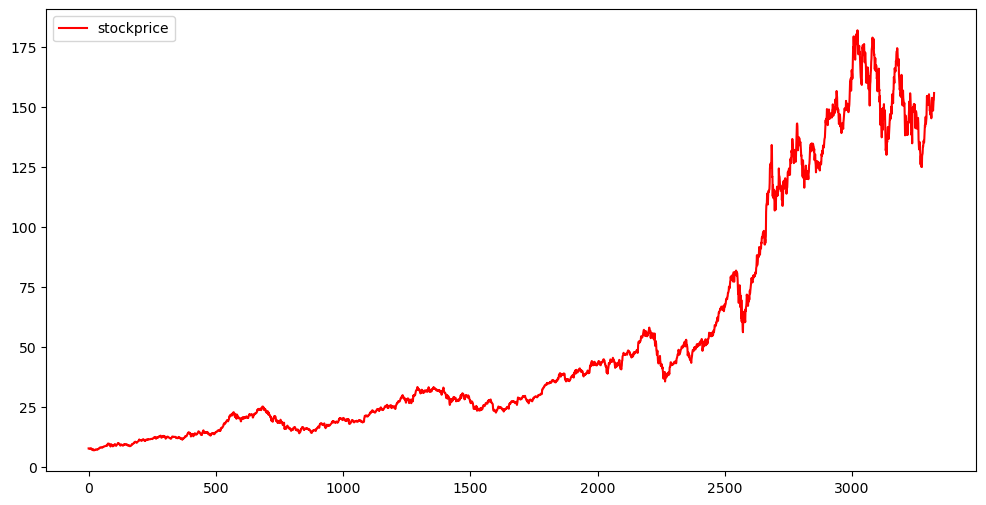

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(df1,'r',label='stockprice')
plt.legend()
plt.show()

In [10]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.83203072],
       [0.83431452],
       [0.85064328]])

In [13]:
int(len(df1)*0.70)

2326

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(2326, 997)

In [16]:
train_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.2302074 ],
       [0.23196302],
       [0.2338043 ]])

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
X_test

array([[0.2377723 , 0.23967067, 0.24015596, ..., 0.26109502, 0.26434935,
        0.26409244],
       [0.23967067, 0.24015596, 0.24202577, ..., 0.26434935, 0.26409244,
        0.25007596],
       [0.24015596, 0.24202577, 0.24645053, ..., 0.26409244, 0.25007596,
        0.25557122],
       ...,
       [0.77390951, 0.78156002, 0.78218806, ..., 0.83362933, 0.82061201,
        0.80867947],
       [0.78156002, 0.78218806, 0.77950465, ..., 0.82061201, 0.80867947,
        0.81992691],
       [0.78218806, 0.77950465, 0.80165699, ..., 0.80867947, 0.81992691,
        0.83203072]])

In [20]:
print(X_train.shape), print(y_train.shape)

(2225, 100)
(2225,)


(None, None)

In [21]:
print(X_test.shape), print(ytest.shape)

(896, 100)
(896,)


(None, None)

In [22]:
len(ytest)

896

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
X_test

array([[[0.2377723 ],
        [0.23967067],
        [0.24015596],
        ...,
        [0.26109502],
        [0.26434935],
        [0.26409244]],

       [[0.23967067],
        [0.24015596],
        [0.24202577],
        ...,
        [0.26434935],
        [0.26409244],
        [0.25007596]],

       [[0.24015596],
        [0.24202577],
        [0.24645053],
        ...,
        [0.26409244],
        [0.25007596],
        [0.25557122]],

       ...,

       [[0.77390951],
        [0.78156002],
        [0.78218806],
        ...,
        [0.83362933],
        [0.82061201],
        [0.80867947]],

       [[0.78156002],
        [0.78218806],
        [0.77950465],
        ...,
        [0.82061201],
        [0.80867947],
        [0.81992691]],

       [[0.78218806],
        [0.77950465],
        [0.80165699],
        ...,
        [0.80867947],
        [0.81992691],
        [0.83203072]]])

In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

2023-05-04 19:36:11.195690: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 19:36:11.264017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 19:36:11.264960: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 19:36:12.303632: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
#compilig
model.compile(loss='mean_squared_error',optimizer='adam')

#trai model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=1)

2023-05-04 19:36:13.484045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:36:13.486386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:36:13.487914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/10


2023-05-04 19:36:13.740526: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:36:13.742799: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:36:13.744255: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2225/2225 [==============================] - ETA: 0s - loss: 1.3451e-04

2023-05-04 19:38:03.295421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:38:03.297827: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:38:03.299259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2225/2225 [==============================] - 124s 54ms/step - loss: 1.3451e-04 - val_loss: 0.0050
Epoch 2/10
2225/2225 [==============================] - 116s 52ms/step - loss: 5.2459e-05 - val_loss: 0.0082
Epoch 3/10
2225/2225 [==============================] - 117s 53ms/step - loss: 4.0216e-05 - val_loss: 0.0035
Epoch 4/10
2225/2225 [==============================] - 117s 53ms/step - loss: 4.2412e-05 - val_loss: 0.0019
Epoch 5/10
2225/2225 [==============================] - 116s 52ms/step - loss: 3.2436e-05 - val_loss: 8.0342e-04
Epoch 6/10
2225/2225 [==============================] - 116s 52ms/step - loss: 2.5584e-05 - val_loss: 3.9988e-04
Epoch 7/10
2225/2225 [==============================] - 116s 52ms/step - loss: 2.8621e-05 - val_loss: 0.0029
Epoch 8/10
2225/2225 [==============================] - 116s 52ms/step - loss: 2.3705e-05 - val_loss: 0.0054
Epoch 9/10
2225/2225 [==============================] - 117s 53ms/step - loss: 2.4246e-05 - val_loss: 0.0059
Epoch 10/10
2225/2225 

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.12.0'

In [31]:
### Lets Do the prediction and check performance metrics
test_predict=model.predict(X_test)
train_predict=model.predict(X_train)

2023-05-04 19:55:48.546446: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:55:48.548839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:55:48.550515: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

28/28 [==============================] - 3s 61ms/step


2023-05-04 19:55:51.089402: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-04 19:55:51.091312: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-04 19:55:51.093026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

70/70 [==============================] - 5s 63ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [33]:
len(test_predict)

896

In [34]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Test data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  0.4676484462572203
Train data MSE:  0.21869506928679228
Test data MAE:  0.30817109440149887
-------------------------------------------------------------------------------------
Test data RMSE:  10.682761687005751
Test data MSE:  114.12139726135796
Test data MAE:  8.642772091286522


In [35]:
from sklearn.metrics import explained_variance_score
print("Train data explained variance regression score:", explained_variance_score(original_ytrain, train_predict))

print("Test data explained variance regression score:", explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9983650509233317
Test data explained variance regression score: 0.9653223355646011


/tmp/ipykernel_31099/1287230660.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']= test_predict


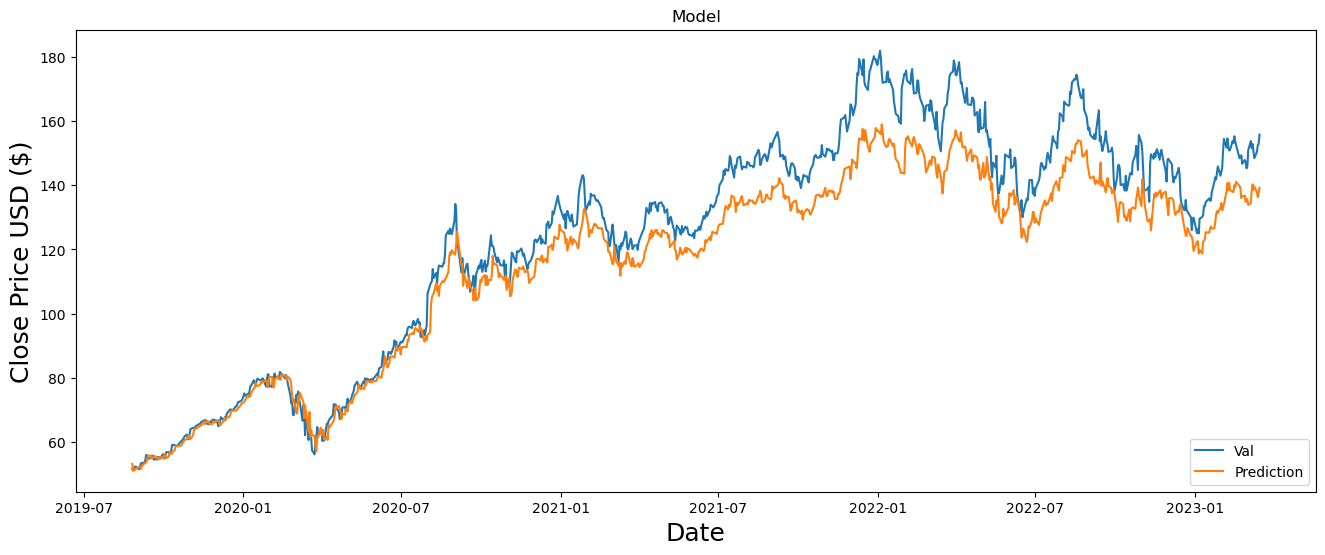

In [36]:
train= data[:training_size]
valid= data[training_size+100+1:len(data)-30]

valid['Prediction']= test_predict

#visualize

plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend([ 'Val', 'Prediction'], loc='lower right')
plt.show()

In [37]:
valid[['Prediction','Close']]

,Prediction,Close
Date,,
2019-08-26,53.107578,51.622501
2019-08-27,50.976112,51.040001
2019-08-28,51.759312,51.382500
2019-08-29,51.202736,52.252499
2019-08-30,51.488670,52.185001
...,...,...
2023-03-10,139.631348,148.500000
2023-03-13,137.839722,150.470001
2023-03-14,136.327866,152.589996


In [38]:
"""
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#testPredictPlot['Close']= data['Close']
# plot baseline and predictions
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1),'r',label='original')
plt.plot(trainPredictPlot,'b',label='train data')
plt.plot(testPredictPlot,'g',label= 'test data')

plt.legend()
plt.show() """

"\n### Plotting \n# shift train predictions for plotting\nlook_back=100\ntrainPredictPlot = numpy.empty_like(df1)\ntrainPredictPlot[:, :] = np.nan\ntrainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict\n# shift test predictions for plotting\ntestPredictPlot = numpy.empty_like(df1)\ntestPredictPlot[:, :] = numpy.nan\ntestPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict\n#testPredictPlot['Close']= data['Close']\n# plot baseline and predictions\nplt.figure(figsize=(12,6))\nplt.plot(scaler.inverse_transform(df1),'r',label='original')\nplt.plot(trainPredictPlot,'b',label='train data')\nplt.plot(testPredictPlot,'g',label= 'test data')\n\nplt.legend()\nplt.show() "

In [39]:
model.save('my_model.h5') 

In [40]:
len(test_data)

997

In [41]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [42]:
len(test_data)

997

In [43]:
x_input

array([[0.80165699, 0.81410334, 0.83060338, 0.81353246, 0.78755487,
        0.85001525, 0.83631274, 0.82095455, 0.78886799, 0.75375548,
        0.7509008 , 0.75398382, 0.75729526, 0.7308609 , 0.79937319,
        0.81553068, 0.80742341, 0.81747184, 0.81033515, 0.82135425,
        0.82460854, 0.80588185, 0.81827115, 0.82335256, 0.80645283,
        0.78424343, 0.76682987, 0.80599607, 0.80759468, 0.80474   ,
        0.798003  , 0.77676418, 0.76551674, 0.7752797 , 0.77248217,
        0.78578498, 0.79138013, 0.77847701, 0.74016718, 0.72880553,
        0.71658751, 0.7161879 , 0.73417234, 0.7157882 , 0.71367577,
        0.70322764, 0.68044731, 0.70082972, 0.70265667, 0.67490923,
        0.68227431, 0.67462374, 0.70088678, 0.70391273, 0.70722417,
        0.72298205, 0.72252529, 0.73023287, 0.73696996, 0.73280215,
        0.7331447 , 0.74798898, 0.76648732, 0.7745946 , 0.77076934,
        0.78275903, 0.79400638, 0.77727801, 0.78464304, 0.7911517 ,
        0.82192522, 0.84293561, 0.82712067, 0.84

In [44]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [45]:
len(temp_input)

100

In [46]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7692511]
101
1 day input [0.81410334 0.83060338 0.81353246 0.78755487 0.85001525 0.83631274
 0.82095455 0.78886799 0.75375548 0.7509008  0.75398382 0.75729526
 0.7308609  0.79937319 0.81553068 0.80742341 0.81747184 0.81033515
 0.82135425 0.82460854 0.80588185 0.81827115 0.82335256 0.80645283
 0.78424343 0.76682987 0.80599607 0.80759468 0.80474    0.798003
 0.77676418 0.76551674 0.7752797  0.77248217 0.78578498 0.79138013
 0.77847701 0.74016718 0.72880553 0.71658751 0.7161879  0.73417234
 0.7157882  0.71367577 0.70322764 0.68044731 0.70082972 0.70265667
 0.67490923 0.68227431 0.67462374 0.70088678 0.70391273 0.70722417
 0.72298205 0.72252529 0.73023287 0.73696996 0.73280215 0.7331447
 0.74798898 0.76648732 0.7745946  0.77076934 0.78275903 0.79400638
 0.77727801 0.78464304 0.7911517  0.82192522 0.84293561 0.82712067
 0.84379198 0.82820546 0.82221062 0.82300993 0.83922457 0.83551343
 0.84767439 0.83842526 0.83180239 0.80856526 0.81102033 0.81381786
 0.79845976 0.80536803 0.80245629 0.7

In [47]:
x_input.shape

(1, 100, 1)

In [48]:
day_new=np.arange(1,30)
day_pred=np.arange(1,30)

In [49]:
len(df1)

3323

In [50]:
df2=scaler.fit_transform(np.array(data).reshape(-1,1))

In [51]:
observed=scaler.inverse_transform(df2[len(df2)-30:])
#observed.tolist()
observed.tolist()



[[155.0],
 [157.39999389648438],
 [159.27999877929688],
 [157.8300018310547],
 [158.92999267578125],
 [160.25],
 [158.27999877929688],
 [157.64999389648438],
 [160.77000427246094],
 [162.36000061035156],
 [164.89999389648438],
 [166.1699981689453],
 [165.6300048828125],
 [163.75999450683594],
 [164.66000366210938],
 [162.02999877929688],
 [160.8000030517578],
 [160.10000610351562],
 [165.55999755859375],
 [165.2100067138672],
 [165.22999572753906],
 [166.47000122070312],
 [167.6300048828125],
 [166.64999389648438],
 [165.02000427246094],
 [165.3300018310547],
 [163.77000427246094],
 [163.75999450683594],
 [168.41000366210938],
 [169.67999267578125]]

In [56]:
lst_output

[[0.7692511081695557],
 [0.707273006439209],
 [0.6624206900596619],
 [0.6277114748954773],
 [0.6001319289207458],
 [0.577358603477478],
 [0.5585138201713562],
 [0.543293833732605],
 [0.5313766598701477],
 [0.5222401022911072],
 [0.5152221918106079],
 [0.5096471309661865],
 [0.5049261450767517],
 [0.5006071925163269],
 [0.4963851571083069],
 [0.492086261510849],
 [0.48764124512672424],
 [0.4830546975135803],
 [0.47837740182876587],
 [0.4736824333667755],
 [0.46904686093330383],
 [0.46453946828842163],
 [0.4602138102054596],
 [0.4561055600643158],
 [0.45223236083984375],
 [0.44859692454338074],
 [0.44519010186195374],
 [0.44199490547180176],
 [0.43899011611938477],
 [0.43615302443504333]]

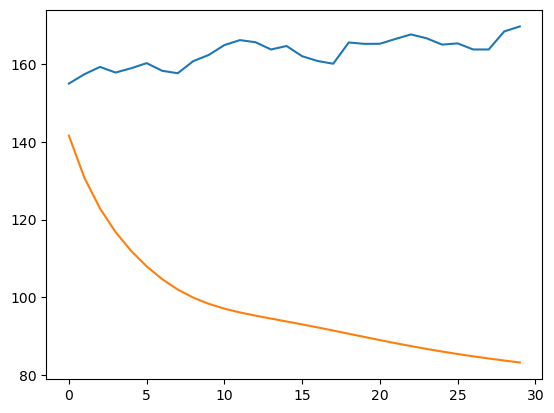

In [52]:
plt.plot(observed)
plt.plot(scaler.inverse_transform(lst_output))

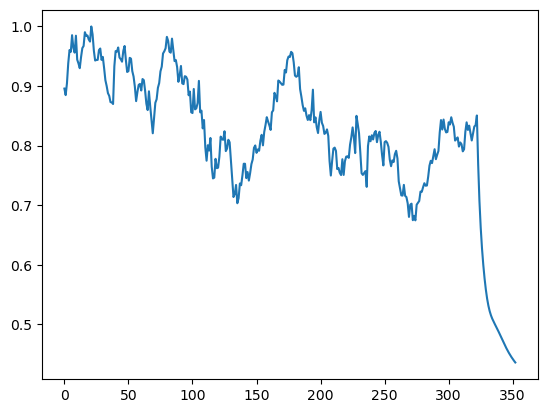

In [53]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3000:])

In [54]:
df3=scaler.inverse_transform(df3).tolist()

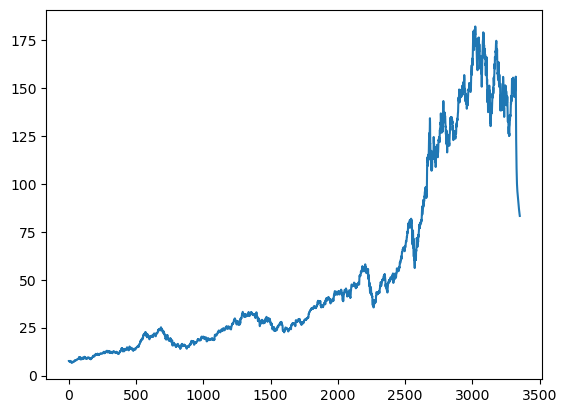

In [55]:
plt.plot(df3)